Many-Body Chern Number without Integration

Koji Kudo, Haruki Watanabe, Toshikaze Kariyado, and Yasuhiro Hatsugai

Phys. Rev. Lett. 122, 146601 – Published 9 April 2019

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.146601

In [368]:
using QuantumOptics
using NBInclude
@nbinclude("Lattice_Basis_Neighbors_Hops.ipynb"; regex=r"#.*executeme")
@nbinclude("QOJulia_utils.ipynb")
@nbinclude("Chern_utils.ipynb")

calc_all_states_H_mb_2 (generic function with 2 methods)

# Parameters

In [87]:
param_dict=Dict{}()

LL = [3, 3]
N = LL[1]*LL[2]
vv_lattice = [ [1., 0], [0, 1.] ]
b1=[0, 0]
vv_basis = [b1]

param_dict["LL"] = LL
param_dict["vv_lattice"] = vv_lattice
param_dict["vv_basis"] = vv_basis

nb = 1
t=-1
p=1
q=3
ϕ=p/q
param_dict["gauge"] = "Landau"
param_dict["t"]=t
param_dict["ϕ"]=ϕ
θθ = [0, 0]
param_dict["θθ"]=θθ

sites, site_coord, site_number = get_sites(LL, vv_lattice, vv_basis);
param_dict["sites"] = sites
param_dict["site_coord"] = site_coord
param_dict["site_number"] = site_number;

pbc=true
param_dict["pbc"] = pbc;
neighbors = [ [1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, -1, 1]  ];
neighbors_list = [ neighbors ];
param_dict["neighbors_list"] = neighbors_list;

N1 = 20
N2 = 20
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

param_dict["Tx"] = Tx;
param_dict["Ty"] = Ty;

# Single Particle

In [88]:
basis = NLevelBasis(N) 
param_dict["basis"] = basis;

In [89]:
param_dict["model_H1"] = get_Hofstadter_hamiltonian
H_T = get_Hofstadter_hamiltonian(param_dict);

H1 = get_sp_op(basis, H_T);

EE, UU = eigenstates(dense(H1));

### Single Particle Chern

In [90]:
param_dict["param_1"] = "Tx"
param_dict["param_2"] = "Ty"
EEA, UUA = calc_all_states_H1(param_dict);

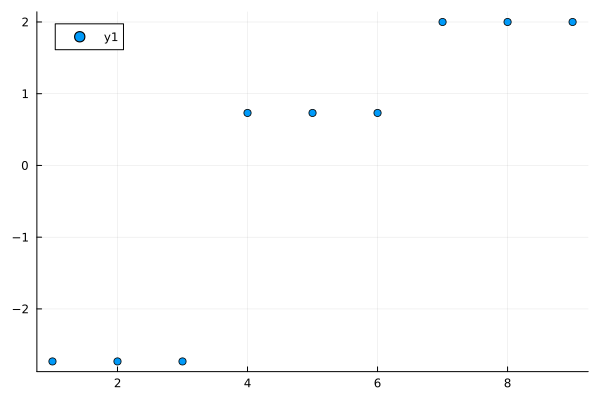

In [91]:
using Plots
scatter(real(EEA[1,1,:]))

In [93]:
bands = [[1,3],[4,6],[7,9]]
#bands = [[1,5],[6,10],[11,15],[16,20],[21,25]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

3-element Vector{Any}:
  0.9999999999999999 + 1.0505055731200461e-16im
 -2.0000000000000004 - 2.390937807419615e-16im
  1.0000000000000002 - 5.312134888481961e-16im

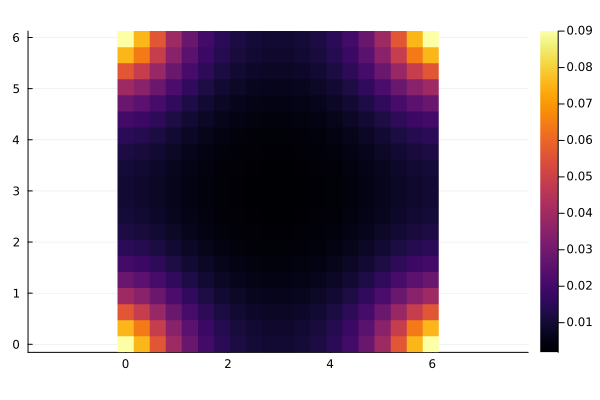

In [94]:
heatmap(Tx,Ty,imag(F12list[3]),aspect_ratio=1)

## Projected Single Particle

In [95]:
param_dict["sub_range"] = 1:3

sub_states = get_subset_states(H1, param_dict["sub_range"]);
subspace_proj, P, Pt = get_projector_op(basis, sub_states);
H1_proj = get_subspace_op(H1, P, Pt)
#param_dict["subspace_proj"] = subspace_proj
param_dict["projection"] = subspace_proj, P, Pt;

### Projected Single Particle Chern

In [96]:
EEA, UUA = calc_all_states_H1(param_dict);

In [98]:
bands = [[1,3]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

1-element Vector{Any}:
 0.9999999999999999 + 1.0505055731200461e-16im

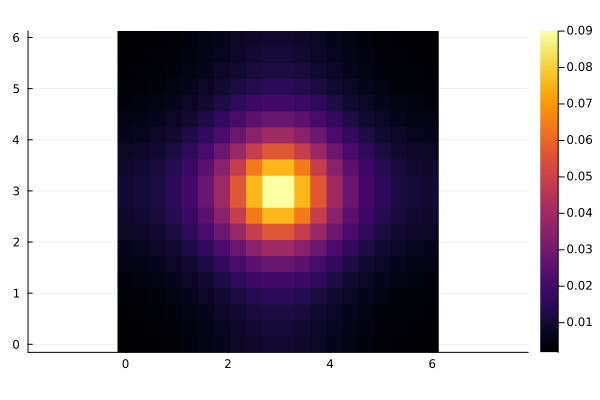

In [99]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)

# Many Body

In [100]:
delete!(param_dict, "sub_range");

In [101]:
PN = 2
param_dict["PN"] = PN
basis_mb = get_basis_mb(param_dict)

ManyBody(onebodybasis=NLevel(N=9), states:45)

In [102]:
param_dict["basis_mb"]

ManyBody(onebodybasis=NLevel(N=9), states:45)

In [103]:
param_dict["dimH_mb"] = length(basis_mb)

45

## Non-Interacting Many Body

In [104]:
basis_mb.shape[1]

45

In [105]:
H1_mb = get_mb_op(basis_mb, H1);

In [106]:
EEA, UUA = calc_all_states_H_mb(param_dict);

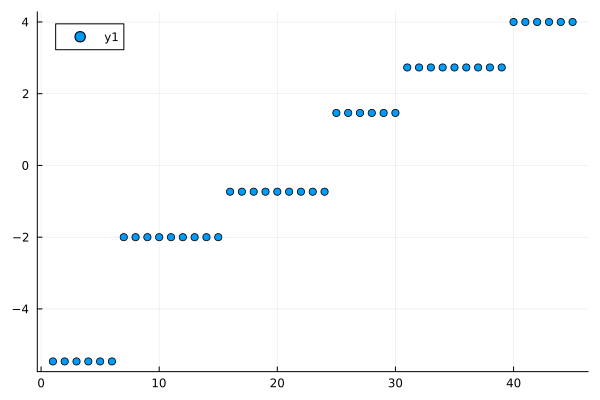

In [107]:
scatter(real(EEA[1,1,:]))

### Non-Interacting Many Body Chern

In [108]:
bands = [[1,6], [7,15], [16,24], [25,30], [31,39], [40,45]]
#bands = [[1,5], [6,10], [11,15], [16,20], [21,25]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

6-element Vector{Any}:
                   4.0 - 3.1250401373865176e-16im
   -3.0000000000000004 + 7.585497596397408e-16im
   -0.9999999999999999 - 8.362761203693972e-17im
 2.208718528794109e-16 + 3.1166556617457667e-16im
   -3.0000000000000004 - 5.304278528981119e-16im
    3.9999999999999996 - 2.9458891225375714e-16im

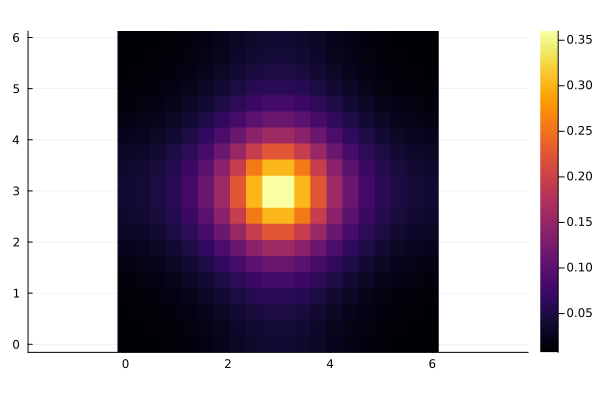

In [109]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)

## Interacting Many Body

### Interacting Many Body Chern

# Projected Many Body

In [468]:
param_dict["sub_range"] = 1:4;

In [469]:
param_dict["θθ"] = [0, 0];

In [470]:
H_T = get_Hofstadter_hamiltonian(param_dict);
H1 = get_sp_op(basis, H_T);
sub_states = get_subset_states(H1, param_dict["sub_range"])

subspace_proj, P, Pt = get_projector_op(basis, sub_states);
param_dict["projection"] = subspace_proj, P, Pt;

In [471]:
PN = 2
param_dict["PN"] = PN
basis_mb_chern = get_basis_mb(param_dict);
param_dict["basis_mb"] = basis_mb_chern

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:4), states:10)

In [472]:
param_dict["dimH_mb"] = length(basis_mb_chern)

10

In [473]:
param_dict["θθ"] = [0, 1.1];

In [474]:
H_mb_Chern_basis = get_H_mb(param_dict);

In [475]:
H_T = get_Hofstadter_hamiltonian(param_dict);
H1 = get_sp_op(basis, H_T);
sub_states = get_subset_states(H1, param_dict["sub_range"])

subspace_proj, P, Pt = get_projector_op(basis, sub_states);
param_dict["projection"] = subspace_proj, P, Pt;

basis_mb_1 = get_basis_mb(param_dict);

In [476]:
H_mb_1 = get_H_mb(param_dict);

In [477]:
H_mb_Chern_basis == H_mb_1

false

In [478]:
basis_mb_1

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:4), states:10)

In [479]:
basis_mb_chern

ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:4), states:10)

In [480]:
U = get_mb_op(basis_mb_chern, P);
U

Operator(dim=10x10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:4), states:10)sparse([1, 2, 3, 4, 1, 2, 3, 4, 5, 6  …  4, 6, 7, 8, 9, 10, 4, 7, 9, 10], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2  …  9, 9, 9, 9, 9, 9, 10, 10, 10, 10], ComplexF64[0.42915756146303874 + 0.7436686538025559im, -0.08739711547817258 + 0.1344494493114575im, -0.20133494094088228 - 0.4814627279491477im, -0.47093346522637386 + 0.30186684662240065im, -0.0968473596382531 + 0.2959991536959662im, 0.32781146398971456 + 0.37781885271196863im, -0.33954032149672964 - 0.39584187913280033im, -0.08777530896422397 - 0.40245422876562104im, -0.08739711547817258 + 0.1344494493114575im, -0.1423653020290909 - 0.3404455598214162im  …  0.01971633180227014 + 0.3607674389839818im, -0.11339071878698723 - 1.0e-17im, 0.25035952791853616 + 0.2691107904830582im, 0.2047466527237491 - 0.41129197918138793im, -0.3875390996190749 - 0.26898777586120903im, 0.14859323415750023 + 0.22281919400170477im, 0.6513035599602118 + 0.075320284

In [481]:
H_mb_Chern_basis

Operator(dim=10x10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=9), states:4), states:10)sparse([1, 2, 3, 4, 1, 2, 3, 4, 5, 6  …  4, 6, 7, 8, 9, 10, 4, 7, 9, 10], [1, 1, 1, 1, 2, 2, 2, 2, 2, 2  …  9, 9, 9, 9, 9, 9, 10, 10, 10, 10], ComplexF64[-4.926996420247963 + 0.0im, 0.00134270823140596 + 0.11126054702219568im, -0.00381295100379286 - 0.04436496728558008im, 0.17044065990036372 - 0.4032770492043352im, 0.00134270823140596 - 0.11126054702219568im, -5.01203421911295 + 0.0im, 0.0526624059637413 - 0.00388650655849825im, -0.3614849085582495 - 0.0806480741906912im, 0.00134270823140596 + 0.11126054702219568im, -0.00269616351111399 - 0.03137076921475302im  …  -0.00269616351111399 + 0.03137076921475302im, -0.3614849085582495 + 0.0806480741906912im, 0.0526624059637413 + 0.00388650655849825im, -0.04191760272075546 - 0.1801732331907797im, -1.6513224998360498 + 0.0im, -0.04191760272075546 + 0.1801732331907797im, 0.17044065990036372 + 0.4032770492043352im, -0.5112168602762746 + 0.114

## Projected Non-Interacting Many Body

In [482]:
EEA, UUA = calc_all_states_H_mb(param_dict);

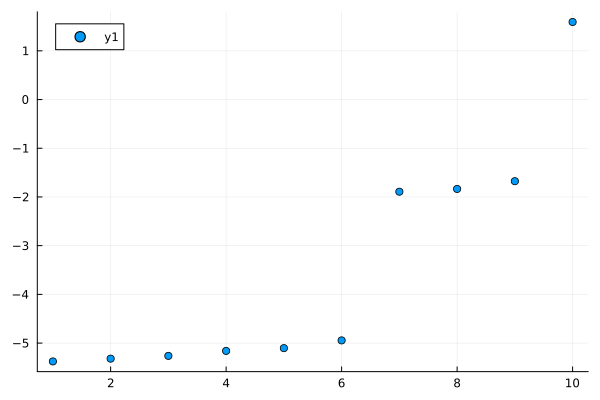

In [483]:
scatter(EEA[1,1,:])#, ylimits=(-6,-4))

### Projected Many Body Chern

In [484]:
#bands = [[1,6], [7,15], [16,21]]
#bands = [[1,3], [4,6]]
#bands = [[1,3]]
bands = [[1,6]]
#bands = [[1,5],[6,10],[11,15]]
#bands = [[1,5]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

1-element Vector{Any}:
 0.9999999999999999 + 2.684637978167788e-17im

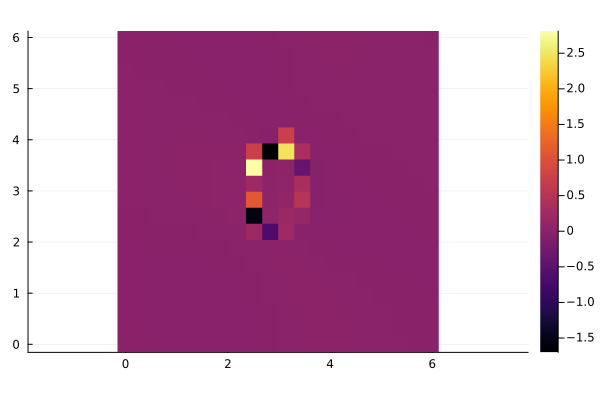

In [485]:
heatmap(Tx,Ty,imag(F12list[1]),aspect_ratio=1)

## Transformed single particle basis

In [486]:
param_dict["sub_range"] = 1:4;

In [487]:
param_dict["θθ"] = [0, 0];

In [488]:
H_T = get_Hofstadter_hamiltonian(param_dict);
H1 = get_sp_op(basis, H_T);
sub_states = get_subset_states(H1, param_dict["sub_range"])

subspace_proj, P, Pt = get_projector_op(basis, sub_states);
param_dict["projection_chern"] = subspace_proj, P, Pt;

In [489]:
PN = 2
param_dict["PN"] = PN
basis_mb_chern = get_basis_mb(param_dict);
param_dict["basis_mb_chern"] = basis_mb_chern
param_dict["dimH_mb"] = length(basis_mb_chern)

10

In [490]:
mb_states_chern = bosonstates(param_dict["projection_chern"][1], param_dict["PN"]);
param_dict["mb_states_chern"] = mb_states_chern

10-element Vector{Vector{Int64}}:
 [2, 0, 0, 0]
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 2, 0, 0]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 2, 0]
 [0, 0, 1, 1]
 [0, 0, 0, 2]

In [491]:
param_dict["θθ"] = [0, 1.1];

In [492]:
H_T = get_Hofstadter_hamiltonian(param_dict);
H1 = get_sp_op(basis, H_T);
sub_states = get_subset_states(H1, param_dict["sub_range"])

subspace_proj, P, Pt = get_projector_op(basis, sub_states);
param_dict["projection"] = subspace_proj, P, Pt;

In [493]:
basis_mb = get_basis_mb(param_dict);
param_dict["basis_mb"] = basis_mb
mb_states = bosonstates(param_dict["projection"][1], param_dict["PN"]);
param_dict["mb_states"] = mb_states

10-element Vector{Vector{Int64}}:
 [2, 0, 0, 0]
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 2, 0, 0]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 2, 0]
 [0, 0, 1, 1]
 [0, 0, 0, 2]

In [494]:
param_dict["projection_chern"][2]*param_dict["projection"][2]'

Operator(dim=4x4)
  basis left:  Subspace(superbasis=NLevel(N=9), states:4)
  basis right: Subspace(superbasis=NLevel(N=9), states:4)
  -0.745246+0.497574im   0.00729881+0.169221im   …    0.0711895-0.132529im
   -0.12398+0.343045im   -0.0942215+0.0183998im       0.0775904-0.0162512im
  -0.122788-0.0978361im    0.933827-0.167325im      -0.00547795-0.130028im
 -0.0413044-0.0693508im  -0.0155637-0.0461017im       -0.270478-0.375028im

In [495]:
param_dict["projection"][2]*param_dict["projection_chern"][2]'

Operator(dim=4x4)
  basis left:  Subspace(superbasis=NLevel(N=9), states:4)
  basis right: Subspace(superbasis=NLevel(N=9), states:4)
  -0.745246-0.497574im    -0.12398-0.343045im   …  -0.0413044+0.0693508im
 0.00729881-0.169221im  -0.0942215-0.0183998im     -0.0155637+0.0461017im
   0.200642+0.272274im  -0.0966635-0.904935im       -0.010712-0.124426im
  0.0711895+0.132529im   0.0775904+0.0162512im      -0.270478+0.375028im

In [496]:
get_state_list(mb_states_chern)

(Any[Any[1, 1], Any[1, 2], Any[1, 3], Any[1, 4], Any[2, 2], Any[2, 3], Any[2, 4], Any[3, 3], Any[3, 4], Any[4, 4]], Any[0.7071067811865475, 1.0, 1.0, 1.0, 0.7071067811865475, 1.0, 1.0, 0.7071067811865475, 1.0, 0.7071067811865475])

In [497]:
EEA, UUA = calc_all_states_H_mb_2(param_dict);

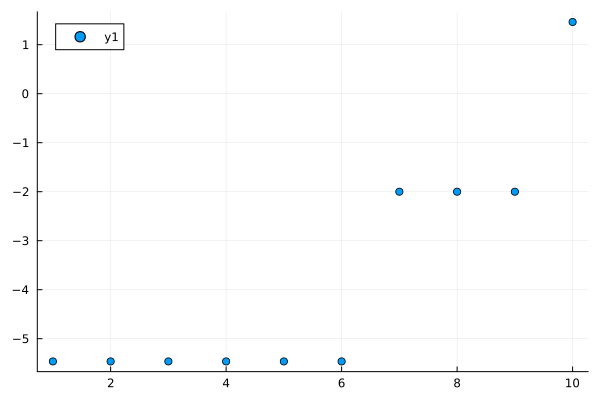

In [498]:
scatter(EEA[1,1,:])#, ylimits=(-6,-4))

In [499]:
bands = [[1,6]]
#bands = [[1,5],[6,10],[11,15]]
#bands = [[1,5]]
Chern, F12list = calc_chern_bands(UUA, bands);
Chern

1-element Vector{Any}:
 -1.0000000000000009 - 2.8595791220108556e-16im